<a href="https://colab.research.google.com/github/juanpalominoh/Fundamentos-de-Econometria/blob/main/Tema_8_Cambio_Estructural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tema 8: Cambio Estructural**

In [ ]:
install.packages("readxl")
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(readxl)
library(ggplot2)

## **Ejemplo: Ahorro - Ingreso**

Ejemplo de Gujarati (2010). Capítulo 8.7.

Los datos son el ingreso personal disponible y el ahorro personal, en miles de millones de dólares, para Estados Unidos de 1970 a 1995. 

In [ ]:
data <- read_excel("/content/Ejemplo.xlsx")
head(data)

Año,Ahorro,Ingreso
<dbl>,<dbl>,<dbl>
1970,61.0,727.1
1971,68.6,790.2
1972,63.6,855.3
1973,89.6,965.0
1974,97.6,1054.2
1975,104.4,1159.2


Queremos ver la relación existente entre el ahorro (Y) con el ingreso personal disponible IPD (X). Veamos el gráfico previamente:

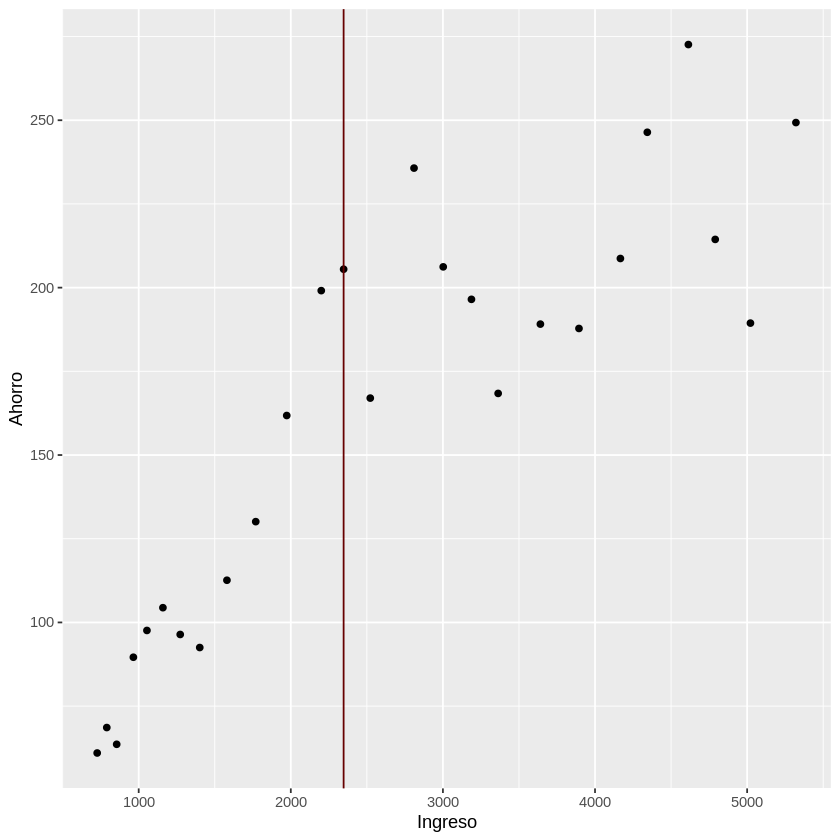

In [ ]:
# Muestra total: 1970-1995
ggplot(data,
      aes(Ingreso,Ahorro)) + 
      geom_point() + 
      geom_vline(xintercept=2347.2,colour = '#660000')

Es un poco difícil afirmar que la relación entre ahorros e IPD no cambio mucho durante el lapso de 26 años. Además, se sabe que en 1982 Estados Unidos experimentó su peor recesión en tiempos de paz. La tasa de desempleo civil alcanzó 9.7%, la más alta desde 1948. Un suceso como éste pudo perturbar la relación entre el ahorro y el IPD. 

In [ ]:
options(scipen=999)

Realizamos la estimación para el periodo 1970-1995: 

\begin{gather*}
Ahorro_{t} = \alpha_{1} + \alpha_{2}Ingreso_{t} + + \epsilon_{t}
\end{gather*}

In [ ]:
modelo <- lm(Ahorro ~ Ingreso, data)
summary(modelo)


Call:
lm(formula = Ahorro ~ Ingreso, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-62.236 -21.208  -9.271  18.726  67.399 

Coefficients:
             Estimate Std. Error t value      Pr(>|t|)    
(Intercept) 62.422671  12.760749   4.892 0.00005469920 ***
Ingreso      0.037679   0.004237   8.894 0.00000000461 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.12 on 24 degrees of freedom
Multiple R-squared:  0.7672,	Adjusted R-squared:  0.7575 
F-statistic:  79.1 on 1 and 24 DF,  p-value: 0.000000004607


In [ ]:
install.packages("ggpubr")
library('ggpubr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘Rcpp’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’




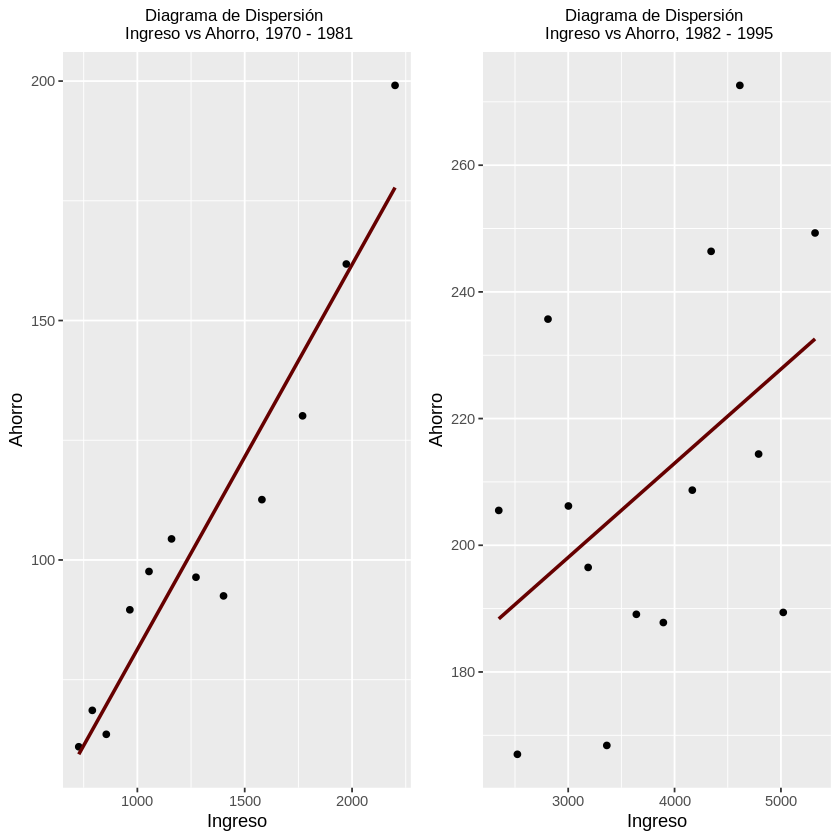

In [ ]:
g1 <- ggplot(data[1:12,],aes(x= Ingreso,y = Ahorro)) + 
  geom_point() + 
  geom_smooth(method = "lm", se=FALSE, color="#660000", formula = y ~ x) +
  ggtitle("Diagrama de Dispersión \n Ingreso vs Ahorro, 1970 - 1981") + 
  theme(plot.title = element_text(size=10,hjust = 0.5))

g2 <- ggplot(data[13:26,],aes(x=Ingreso,y=Ahorro)) + 
  geom_point() + 
  geom_smooth(method = "lm", se=FALSE, color="#660000", formula = y ~ x) +
  ggtitle("Diagrama de Dispersión \n Ingreso vs Ahorro, 1982 - 1995") + 
  theme(plot.title = element_text(size=10,hjust = 0.5))

ggarrange(g1,g2)

**Modelo de Regresión Lineal 1970 -1981**

Realizamos la estimación para el periodo 1970-1981 ($n_{1}=12$): 

\begin{gather*}
Ahorro_{t} = \lambda_{1} + \lambda_{2}Ingreso_{t} +  \epsilon_{1t}
\end{gather*}

In [ ]:
datos1 <- data[1:12,]

In [ ]:
modelo1 <- lm(Ahorro ~ Ingreso, datos1)
summary(modelo1)


Call:
lm(formula = Ahorro ~ Ingreso, data = datos1)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.093  -8.425   1.920  10.463  21.338 

Coefficients:
             Estimate Std. Error t value  Pr(>|t|)    
(Intercept)  1.016117  11.637707   0.087     0.932    
Ingreso      0.080332   0.008367   9.602 0.0000023 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.36 on 10 degrees of freedom
Multiple R-squared:  0.9021,	Adjusted R-squared:  0.8924 
F-statistic: 92.19 on 1 and 10 DF,  p-value: 0.000002304


**Modelo de Regresión Lineal 1982 -1995**

Realizamos la estimación para el periodo 1982-1995 ($n_{2}=14$): 

\begin{gather*}
Ahorro_{t} = \gamma_{1} + \gamma_{2}Ingreso_{t} +  \epsilon_{2t}
\end{gather*}

In [ ]:
datos2 <- data[13:26,]

In [ ]:
modelo2 <- lm(Ahorro ~ Ingreso, datos2)
summary(modelo2)


Call:
lm(formula = Ahorro ~ Ingreso, data = datos2)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.729 -22.309  -5.547  17.020  50.535 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 153.494670  32.712272   4.692 0.000521 ***
Ingreso       0.014862   0.008393   1.771 0.101972    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 28.88 on 12 degrees of freedom
Multiple R-squared:  0.2072,	Adjusted R-squared:  0.1411 
F-statistic: 3.136 on 1 and 12 DF,  p-value: 0.102


In [ ]:
install.packages("memisc")
library(memisc)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: lattice

Loading required package: MASS


Attaching package: ‘memisc’


The following object is masked from ‘package:ggplot2’:

    syms


The following objects are masked from ‘package:stats’:

    contr.sum, contr.treatment, contrasts


The following object is masked from ‘package:base’:

    as.array




El resumen de las estimaciones:

In [ ]:
table_1 <- mtable("Periodo 1970-1995" = modelo,
                  "Periodo 1970-1981" = modelo1,
                  "Periodo 1982-1995" = modelo2,
            summary.stats = c("N", "R-squared", "F", "p"),
            coef.style = "default", 
            digits=3)
table_1

Calls:
Periodo 1970-1995: lm(formula = Ahorro ~ Ingreso, data = data)
Periodo 1970-1981: lm(formula = Ahorro ~ Ingreso, data = data[1:12, ])
Periodo 1982-1995: lm(formula = Ahorro ~ Ingreso, data = data[13:26, ])

========================================================================
               Periodo 1970-1995  Periodo 1970-1981  Periodo 1982-1995  
------------------------------------------------------------------------
  (Intercept)      62.423***           1.016            153.495***      
                  (12.761)           (11.638)           (32.712)        
  Ingreso           0.038***           0.080***           0.015         
                   (0.004)            (0.008)            (0.008)        
------------------------------------------------------------------------
  N                26                 12                 14             
  R-squared         0.767              0.902              0.207         
  F                79.099             92.190              3.136         
  p                 0.000              0.000              0.102         
========================================================================
  Significance: *** = p < 0.001; ** = p < 0.01; * = p < 0.05

## **Prueba de Chow**

Hipótesis de cambio estructura:

\begin{gather*}
H_{0}: \alpha_{1} = \lambda_{1} = \gamma_{1};  
        \alpha_{2} = \lambda_{2} = \gamma_{2} 
\end{gather*}

\begin{gather*}
H_{1}: \alpha_{1} \neq \lambda_{1} \neq \gamma_{1};       \alpha_{2} \neq \lambda_{2} \neq \gamma_{2} 
\end{gather*}

### Obtención de las SCR

In [ ]:
SCR <- sum((fitted(modelo) - data$Ahorro)^2)
SCR1 <- sum((fitted(modelo1) - datos1$Ahorro)^2)
SCR2 <- sum((fitted(modelo2) - datos2$Ahorro)^2)
SCR_NR <- SCR1 + SCR2

cat('SCR= ', SSE, 'SCR1 = ', SSE1, 'SCR2 = ', SSE2, 'SCR_NR = ',SCR_NR)

SCR=  23248.3 SCR1 =  1785.032 SCR2 =  10005.22 SCR_NR =  11790.25

### Calculo de F

In [ ]:
F <- ((SCR-SCR_NR)/2)/(SCR_NR/(nrow(datos1)+nrow(datos2)-2*2))
Ft <- qf(0.95,2,nrow(datos1)+nrow(datos2)-2*2)
p <-  df(F,2,nrow(datos1)+nrow(datos2)-2*2)*2

cat('F = ', F, 'Ft = ', Ft, 'Valor p = ', p)

F =  10.69006 Ft =  3.443357 Valor p =  0.0005789131

In [ ]:
install.packages("strucchange")
library(strucchange)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
sctest(data$Ahorro ~ data$Ingreso, type = "Chow", point = 12)


	Chow test

data:  data$Ahorro ~ data$Ingreso
F = 10.69, p-value = 0.0005708


# **Regresión Recursiva**

In [ ]:
# Identificación de numero de coeficientes inicial
model <- lm(Ahorro ~ Ingreso, data)

In [ ]:
# Dataframe
df <- data.frame(data$Ahorro, data$Ingreso)

df <- df %>%
    rename(data.Ahorro=Ahorro, data.Ingreso=Ingreso)
df

Ahorro,Ingreso
<dbl>,<dbl>
61.0,727.1
68.6,790.2
63.6,855.3
89.6,965.0
97.6,1054.2
104.4,1159.2
96.4,1273.0
92.5,1401.4
112.6,1580.1


In [ ]:
n  <- (nrow(coef(summary(model))))+1   # k+1
n

[1] 3

In [ ]:
# Recursividad
estimador <- lapply(seq(n, nrow(df)),
                    function(x) lm(Ahorro ~ Ingreso, data = df[1:x,]))

In [ ]:
# Número de regresiones
g  <- length(estimador)
g

[1] 24

In [ ]:
# Regresión
estimador[[10]]
summary(estimador[[10]])


Call:
lm(formula = Ahorro ~ Ingreso, data = df[1:x, ])

Coefficients:
(Intercept)      Ingreso  
    1.01612      0.08033  



Call:
lm(formula = Ahorro ~ Ingreso, data = df[1:x, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-21.093  -8.425   1.920  10.463  21.338 

Coefficients:
             Estimate Std. Error t value  Pr(>|t|)    
(Intercept)  1.016117  11.637707   0.087     0.932    
Ingreso      0.080332   0.008367   9.602 0.0000023 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.36 on 10 degrees of freedom
Multiple R-squared:  0.9021,	Adjusted R-squared:  0.8924 
F-statistic: 92.19 on 1 and 10 DF,  p-value: 0.000002304


In [ ]:
# Extraer coeficientes calculados del intercepto
b1 <- unlist(sapply(1:g,function(j) estimador[[j]]$coefficients[1]))
b1

(Intercept) (Intercept) (Intercept) (Intercept) (Intercept) (Intercept) 
  48.766060  -22.376804  -27.184493  -20.452743    3.656037   24.837031 
(Intercept) (Intercept) (Intercept) (Intercept) (Intercept) (Intercept) 
  27.234363   24.358529   14.136081    1.016117   -3.741880    7.184583 
(Intercept) (Intercept) (Intercept) (Intercept) (Intercept) (Intercept) 
   3.045486    9.725515   18.121167   30.018069   37.991614   45.719044 
(Intercept) (Intercept) (Intercept) (Intercept) (Intercept) (Intercept) 
  50.251622   49.898420   48.053360   53.422757   60.901426   62.422671

In [ ]:
# Extraer coeficientes calculados del ingreso
b2 <- unlist(sapply(1:g,function(j) estimador[[j]]$coefficients[2]))
b2

Ingreso    Ingreso    Ingreso    Ingreso    Ingreso    Ingreso    Ingreso 
0.01976811 0.11154938 0.11756511 0.10944271 0.08141966 0.05774841 0.05519257 
   Ingreso    Ingreso    Ingreso    Ingreso    Ingreso    Ingreso    Ingreso 
0.05812654 0.06810471 0.08033188 0.08462983 0.07513827 0.07853005 0.07325301 
   Ingreso    Ingreso    Ingreso    Ingreso    Ingreso    Ingreso    Ingreso 
0.06685642 0.05810256 0.05253332 0.04736671 0.04446693 0.04468656 0.04578588 
   Ingreso    Ingreso    Ingreso 
0.04267377 0.03849292 0.03767913

In [ ]:
# Extraer niveles de confianza del intercepto
conf1 <- unlist(sapply(1:g, function(k) confint.default(estimador[[k]],1)))
conf1


-39.66052,-95.03351,-69.32235,-49.176495,-30.89737,-10.76843,-0.0369237,2.672361,-6.766898,-21.79337,⋯,-4.594391,2.508169,10.09497,17.51284,23.19103,24.51101,24.00608,29.05282,34.70399,37.41206
137.19264,50.27990,14.95336,8.271009,38.20944,60.44250,54.5056505,46.044696,35.039061,23.82560,⋯,40.836725,57.527969,65.88826,73.92525,77.31221,75.28583,72.10064,77.79269,87.09886,87.43328


In [ ]:
# Extraer niveles de confianza del ingreso
conf2 <- unlist(sapply(1:g, function(k) confint.default(estimador[[k]],2)))
conf2

-0.09179756,0.02495281,0.07001885,0.07879677,0.04659522,0.02390626,0.03091033,0.04010674,0.05193265,0.06393378,⋯,0.05497701,0.04448588,0.03947593,0.03487019,0.03311135,0.03455450,0.03665160,0.03383276,0.02940123,0.02937560
0.13133378,0.19814595,0.16511138,0.14008864,0.11624409,0.09159055,0.07947481,0.07614634,0.08427678,0.09672998,⋯,0.07873584,0.07171924,0.06559070,0.05986323,0.05582252,0.05481863,0.05492016,0.05151478,0.04758461,0.04598266


In [ ]:
# arreglo de datos en forma matricial
arrb1 <- cbind(b1, t(conf1))
arrb1

,b1,,
(Intercept),48.766060,-39.6605204,137.192641
(Intercept),-22.376804,-95.0335109,50.279903
(Intercept),-27.184493,-69.3223492,14.953364
(Intercept),-20.452743,-49.1764946,8.271009
(Intercept),3.656037,-30.8973671,38.209441
(Intercept),24.837031,-10.7684325,60.442495
(Intercept),27.234363,-0.0369237,54.505650
(Intercept),24.358529,2.6723614,46.044696
(Intercept),14.136081,-6.7668982,35.039061
(Intercept),1.016117,-21.7933698,23.825605


In [ ]:
arrb2 <- cbind(b2, t(conf2))
arrb2

,b2,,
Ingreso,0.01976811,-0.09179756,0.13133378
Ingreso,0.11154938,0.02495281,0.19814595
Ingreso,0.11756511,0.07001885,0.16511138
Ingreso,0.10944271,0.07879677,0.14008864
Ingreso,0.08141966,0.04659522,0.11624409
Ingreso,0.05774841,0.02390626,0.09159055
Ingreso,0.05519257,0.03091033,0.07947481
Ingreso,0.05812654,0.04010674,0.07614634
Ingreso,0.06810471,0.05193265,0.08427678
Ingreso,0.08033188,0.06393378,0.09672998


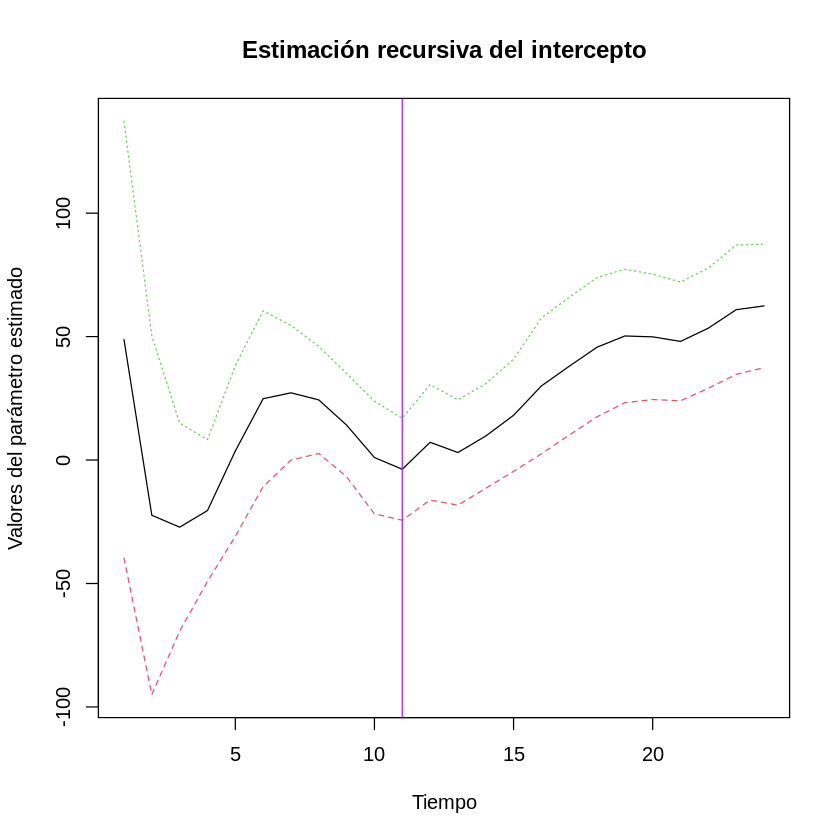

In [ ]:
matplot(arrb1, 
        type="l",
        xlab="Tiempo",
        ylab="Valores del parámetro estimado",
        main="Estimación recursiva del intercepto")  
abline(v=11, col="purple")

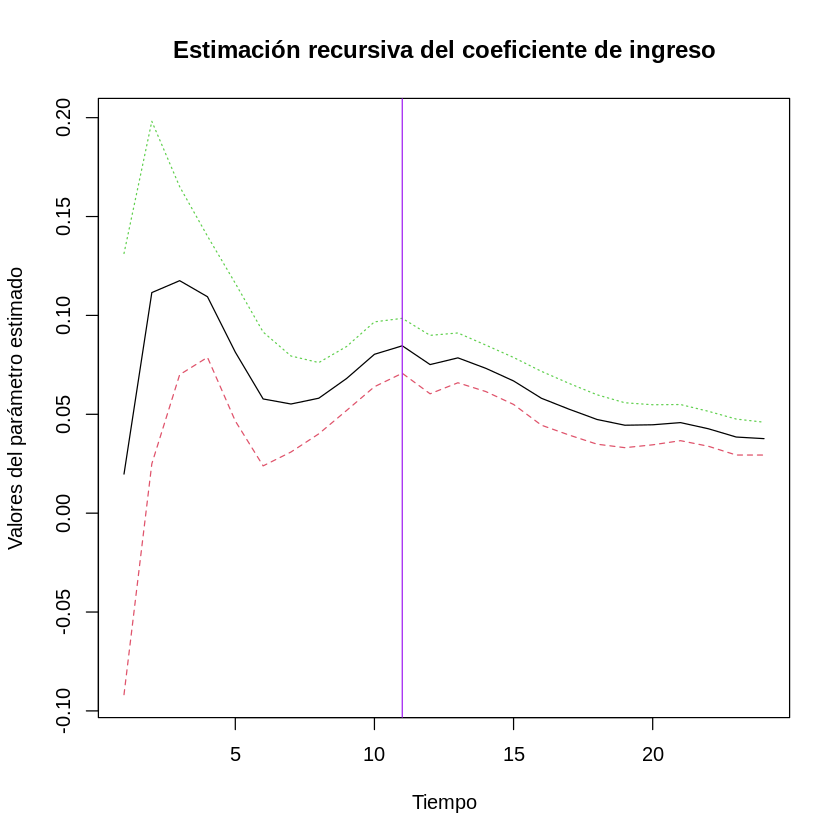

In [ ]:
matplot(arrb2, 
        type="l",
        xlab="Tiempo",
        ylab="Valores del parámetro estimado",
        main="Estimación recursiva del coeficiente de ingreso")
abline(v=11, col="purple")

Otra manera de presentar:

In [ ]:
# Base para intercepto
base_interc <- as.data.frame(cbind(1:24, b1, t(conf1))) %>%
        rename(V1=tiempo, V3=low_limit, V4=upper_limit)

In [ ]:
# Base para el coeficiente de ingresos
base_ingres <- as.data.frame(cbind(1:24, b2, t(conf2))) %>%
        rename(V1=tiempo, V3=low_limit, V4=upper_limit)

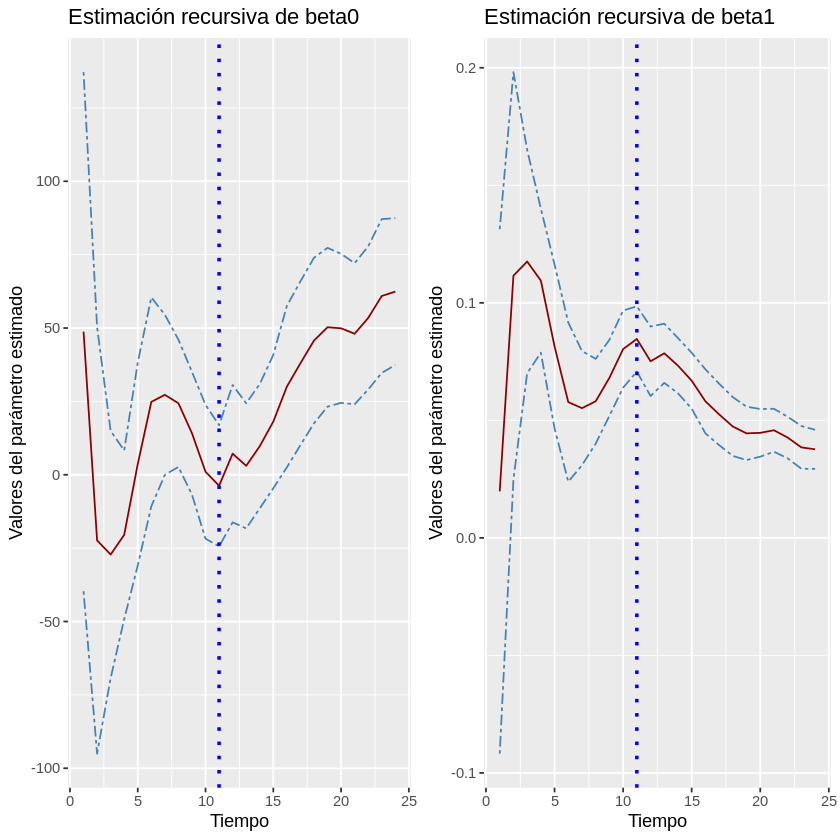

In [ ]:
figura1 <- ggplot(base_interc, aes(x=tiempo)) + 
  geom_line(aes(y=b1), color="darkred") +
  geom_line(aes(y=low_limit), color="steelblue", linetype="twodash") +
  geom_line(aes(y=upper_limit), color="steelblue", linetype="twodash") +
  ggtitle("Estimación recursiva de beta0") +
  xlab("Tiempo") + ylab("Valores del parámetro estimado") + 
  geom_vline(xintercept = 11, linetype="dotted", 
                color = "blue", size=1)

figura2 <- ggplot(base_ingres, aes(x=tiempo)) + 
  geom_line(aes(y=b2), color="darkred") +
  geom_line(aes(y=low_limit), color="steelblue", linetype="twodash") +
  geom_line(aes(y=upper_limit), color="steelblue", linetype="twodash") +
  ggtitle("Estimación recursiva de beta1") +
  xlab("Tiempo") + ylab("Valores del parámetro estimado") +
  geom_vline(xintercept = 11, linetype="dotted", 
                color = "blue", size=1)

ggarrange(figura1,figura2)

**Interpretación:**
*   Intercepto: irregular al principio y en el dato 11 empieza a tener una tendencia creciente. No existe una estabilidad en este parametro. 
*   Existe cambio estructural para el parametro beta1: Propension marginal al ahorro

# **Pruebas Recursivas: $Cusum$ y $Cusum^{2}$**

### Análisis Recursivo

In [ ]:
cusum <- efp(Ahorro ~ Ingreso, data, type = "Rec-CUSUM")
cusum$process

A Time Series:
 [1]  0.00000000 -0.03805297  0.03353644  0.04401176  0.02133542 -0.09408273
 [7] -0.22906455 -0.24775983 -0.21918347 -0.09106939  0.11079786  0.20655090
[13] -0.05620324  0.05021639 -0.15356829 -0.45064446 -0.93149502 -1.26994159
[19] -1.62529613 -1.84930892 -1.82954475 -1.72018334 -2.07393352 -2.59926947
[25] -2.70947207

In [ ]:
sctest(cusum)


	Recursive CUSUM test

data:  cusum
S = 0.90316, p-value = 0.06927


### Análisis Recursivo - Gráfico $Cusum$

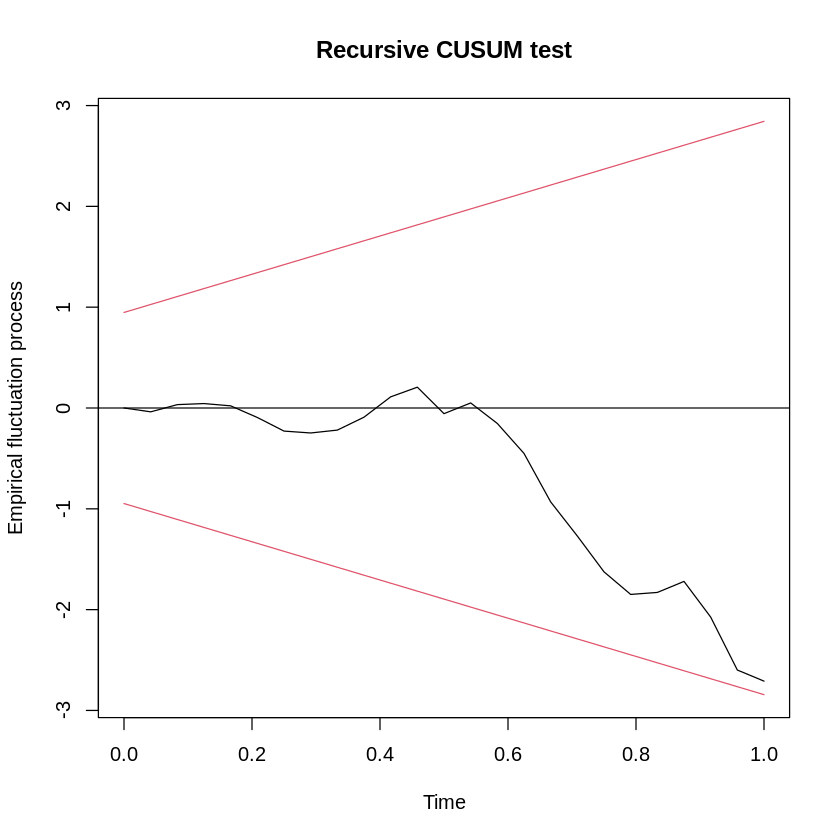

In [ ]:
plot(cusum)

### Análisis Recursivo - Residuales


In [ ]:
rcres <-recresid(Ahorro ~ Ingreso, data)
rcres

[1]  -5.160278   9.708080   1.420535  -3.075088 -15.651598 -18.304582
 [7]  -2.535225   3.875176  17.373264  27.374767  12.984856 -35.631501
[13]  14.431328 -27.634784 -40.285835 -65.207068 -45.895983 -48.188833
[19] -30.377874   2.680176  14.830256 -47.971271 -71.239633 -14.944328

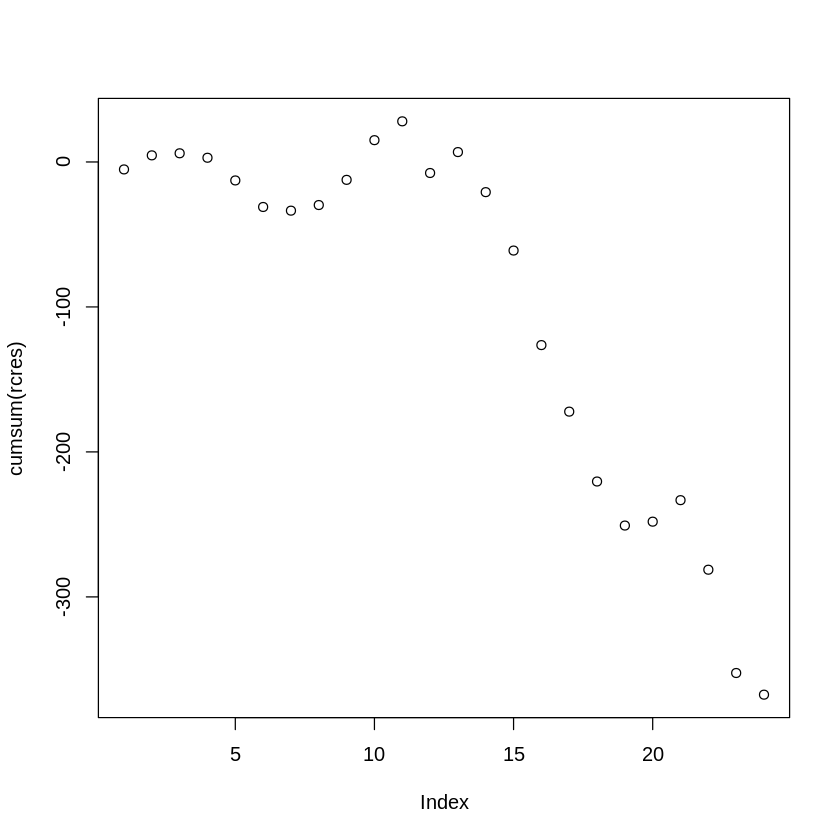

In [ ]:
plot(cumsum(rcres))

### Análisis Recursivo - Gráfico $Cusum^{2}$

In [ ]:
N=length(rcres)
cumq=cumsum(rcres^2)/sum(rcres^2)
cumq

[1] 0.001145394 0.005199318 0.005286116 0.005692863 0.016230086 0.030642226
 [7] 0.030918692 0.031564631 0.044547530 0.076781194 0.084033617 0.138644232
[13] 0.147602447 0.180451359 0.250260706 0.433154166 0.523760421 0.623645739
[19] 0.663339622 0.663648606 0.673108932 0.772094363 0.990393579 1.000000000

In [ ]:
Af=0.948    # Cuantil del 95% para la estadística cusum
co=0.14422  # Valor del cuantil aproximado para cusumsq para n/2
LS=Af*sqrt(N)+2*Af*c(1:length(rcres))/sqrt(N)
LI=-LS
LQS=co+(1:length(rcres))/N
LQI=-co+(1:length(rcres))/N

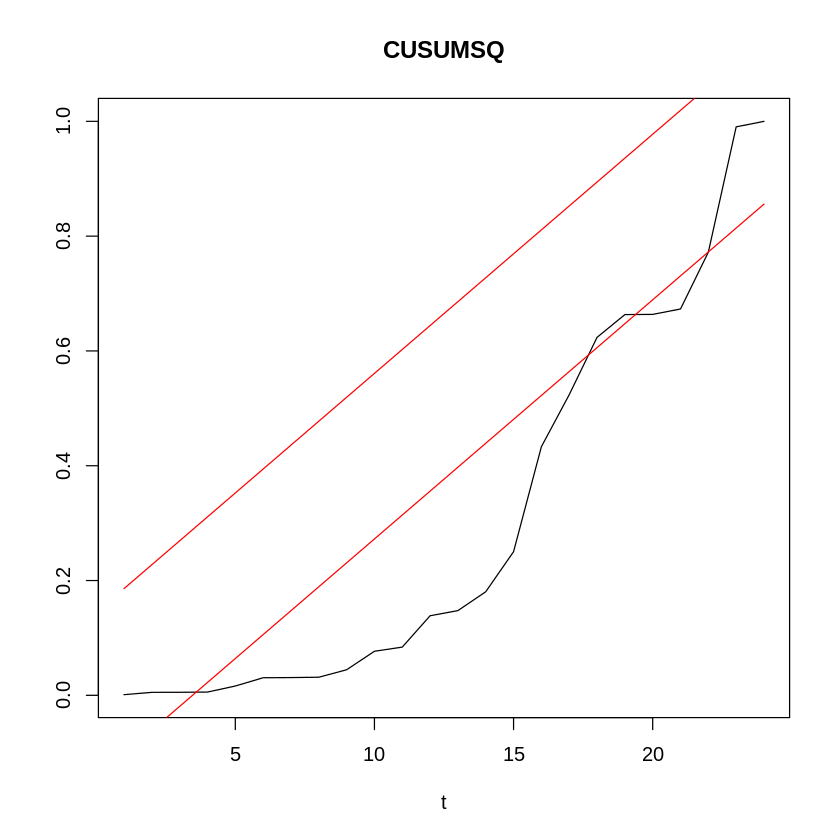

In [ ]:
# CUSUM cuadrado
plot(cumq,type="l",xlab="t",ylab="",main="CUSUMSQ")        
lines(LQS,type="l",col="red")                            
lines(LQI,type="l",col="red")